In [1]:
!pip install scikit-learn==0.23
import sklearn
print(sklearn.__version__)

  Using cached scikit_learn-0.23.0-cp37-cp37m-macosx_10_9_x86_64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
0.23.0


In [2]:
from sklearn import set_config
set_config(display='diagram')

# Classification

Instead of predicting a continuous value, we try to predict discrete values. For example, did a passenger aboard the Titanic survive or not?

Data preprocessing techniques for numerical and categorical variables remains the same.

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/instituteofai/ML-101/master/Datasets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Select feature and label columns

In [6]:
features = df.drop(['PassengerId', 'Survived', 'Name'], axis=1)
labels = df[['Survived']]

print(features.head())
print(labels.head())

   Pclass     Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
0       3    male  22.0      1      0         A/5 21171   7.2500   NaN   
1       1  female  38.0      1      0          PC 17599  71.2833   C85   
2       3  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
3       1  female  35.0      1      0            113803  53.1000  C123   
4       3    male  35.0      0      0            373450   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  
   Survived
0         0
1         1
2         1
3         1
4         0


## Types of classification
 - Binary classification (this problem)
 - Multiclass classification (The season - summer, winter, monsoon, spring)
 - Multilabel classification (Genres of a movie on Netflix - comedy, action, thriller, romance, sci-fi, etc.)


## Building a baseline model
Missing values and imputation strategies:
 - Age: replace missing values with mean age
 - Cabin: replace missing values with "Other"
 - Embarked: replace missing values with "X"

In [7]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='mean')
cabin_imputer = SimpleImputer(strategy='constant', fill_value='OTHER')
embarked_imputer = SimpleImputer(strategy='constant', fill_value='X')

Create pipelines and transformers for preprocessing numerical and categorical variables.

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_columns = [
  'Pclass', 'Sex', 'SibSp', 'Parch',
  'Ticket', 'Cabin', 'Embarked'
]

numerical_columns = ['Age', 'Fare']

preprocessing_pipeline = make_column_transformer(
  (
    make_pipeline(
      make_column_transformer((age_imputer, ['Age']), remainder='passthrough'),
      StandardScaler()
    ),
    numerical_columns
  ),
  (
    make_pipeline(
      make_column_transformer(
          (cabin_imputer, ['Cabin']),
          (embarked_imputer, ['Embarked']),
          remainder='passthrough'),
      OneHotEncoder(handle_unknown='ignore')
    ),
    categorical_columns
  ),
  sparse_threshold=0
)

Create a pipeline with a classifier at the end.

In [59]:
from sklearn.pipeline import Pipeline
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline([
  ('preprocessing', preprocessing_pipeline),
  ('model', KNeighborsClassifier())
])

In [60]:
model_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('simpleimputer',
                                                                                                    SimpleImputer(),
                                                                                                    ['Age'])])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTra...hrough',
                                                                                     transformers=[('simpleimputer-1',
                                                                                                    SimpleImputer(fill_value='OTHER',
                                                                                                                  strategy='constant'),
                                                                                                    ['Cabin']),
                                                                                                   ('simpleimputer-2',
                                                                                                    SimpleImputer(fill_value='X',
                                                                                                                  strategy='constant'),
                                                                                                    ['Embarked'])])),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Ticket', 'Cabin',
                                                   'Embarked'])])),
                ('model', KNeighborsClassifier())])

In [61]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Train/test split.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

Train model and check accuracy on test set.

In [66]:
model_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('simpleimputer',
                                                                                                    SimpleImputer(),
                                                                                                    ['Age'])])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTra...hrough',
                                                                                     transformers=[('simpleimputer-1',
                                                                                                    SimpleImputer(fill_value='OTHER',
                                                                                                                  strategy='constant'),
                                                                                                    ['Cabin']),
                                                                                                   ('simpleimputer-2',
                                                                                                    SimpleImputer(fill_value='X',
                                                                                                                  strategy='constant'),
                                                                                                    ['Embarked'])])),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Ticket', 'Cabin',
                                                   'Embarked'])])),
                ('model', KNeighborsClassifier())])

In [14]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,3,male,NaN,1,1,2661,15.2458,NaN,C
439,2,male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,3,male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,2,female,6.0,0,1,248727,33.0000,NaN,S
39,3,female,14.0,1,0,2651,11.2417,NaN,C


In [17]:
y_test.head(10)

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


In [67]:
model_pipeline.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

## Evaluation Metrics

 - Accuracy
 - Confusion Matrix
 - Precision
 - Recall
 - F1 score

In [68]:
# Accuracy
model_pipeline.score(X_test, y_test)

0.8044692737430168

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_pipeline.predict(X_test))

0.8044692737430168

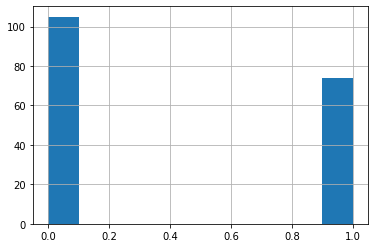

In [70]:
import matplotlib.pyplot as plt
y_test.Survived.hist()
plt.show()

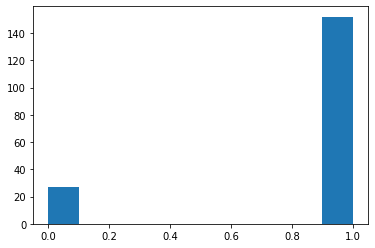

In [23]:
plt.hist(model_pipeline.predict(X_test))
plt.show()

[[94 11]
 [24 50]]


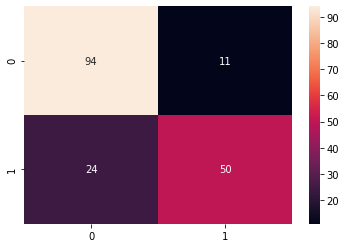

In [71]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(y_test, model_pipeline.predict(X_test))
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

In [25]:
(67+20)/(67+20+85+7)

0.4860335195530726

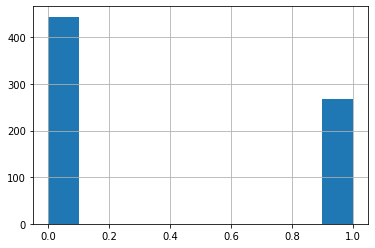

In [26]:
y_train.Survived.hist()

<img src="1200px-Precisionrecall.png" width="400px" />

In [72]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, model_pipeline.predict(X_test))

0.819672131147541

In [73]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, model_pipeline.predict(X_test))

0.6756756756756757

In [74]:
# F1 score
from sklearn.metrics import f1_score

# f1 = (2*p*r)/(p+r)

f1_score(y_test, model_pipeline.predict(X_test))

0.7407407407407408

## Other models

 - Decision Tree/Random Forest
 - SVM
 - KNN
 - Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

logreg_pipeline = Pipeline([
  ('preprocessing', preprocessing_pipeline),
  ('model', LogisticRegression())
])

In [76]:
logreg_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('simpleimputer',
                                                                                                    SimpleImputer(),
                                                                                                    ['Age'])])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('columntransformer',
                                                                   ColumnTra...sthrough',
                                                                                     transformers=[('simpleimputer-1',
                                                                                                    SimpleImputer(fill_value='OTHER',
                                                                                                                  strategy='constant'),
                                                                                                    ['Cabin']),
                                                                                                   ('simpleimputer-2',
                                                                                                    SimpleImputer(fill_value='X',
                                                                                                                  strategy='constant'),
                                                                                                    ['Embarked'])])),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Ticket', 'Cabin',
                                                   'Embarked'])])),
                ('model', LogisticRegression())])

In [77]:
logreg_pipeline.decision_function(X_test)

array([-1.62516676, -1.35506147, -2.15266123,  2.35246655,  1.93992863,
        1.32417782,  0.64894134, -2.71769984,  1.04096045,  2.35297939,
       -0.3751281 , -2.84927605, -1.10642694, -1.92519674, -1.49291375,
        3.01854037, -0.68782037,  0.64917426, -1.23154534, -1.1195462 ,
       -2.26891085, -1.50920801,  0.5919126 , -2.14883799, -2.40917981,
       -3.94815351, -1.16007784, -1.34770908, -3.7739079 ,  0.24753941,
       -2.12370617,  0.50860137, -0.84636517,  0.29023968, -2.09421174,
       -1.8209312 , -0.32728493,  0.64894134,  1.68347271, -2.42860248,
       -1.60324069, -2.42073336, -2.42814898, -2.0709178 , -0.03299314,
       -2.49770469, -2.12293417, -2.23596079, -2.27139831, -0.68982268,
        1.98000464,  2.19475021, -4.14382131,  1.09110918, -3.1019045 ,
        2.37037884, -1.3841024 ,  2.09701618,  1.27951398,  0.95421762,
       -2.18214331,  2.35613452,  1.49338728, -1.38032839, -2.0709178 ,
        1.35213943, -1.37829079, -2.41417669, -1.28576506,  2.49

In [78]:
logreg_pipeline.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1])

In [79]:
print(f'Accuracy: {accuracy_score(y_test, logreg_pipeline.predict(X_test))}')
print(f'Precision: {precision_score(y_test, logreg_pipeline.predict(X_test))}')
print(f'Recall: {recall_score(y_test, logreg_pipeline.predict(X_test))}')
print(f'f1: {f1_score(y_test, logreg_pipeline.predict(X_test))}')

Accuracy: 0.8156424581005587
Precision: 0.7971014492753623
Recall: 0.7432432432432432
f1: 0.7692307692307693


## ROC AUC

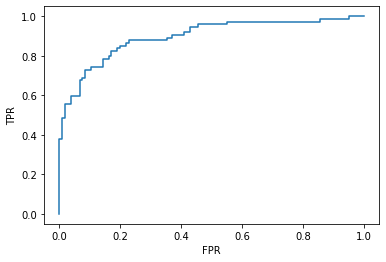

In [80]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# TPR = TP / (TP + FN)

# FPR = FP / (FP + TN)

fpr, tpr, _ = roc_curve(y_test, logreg_pipeline.decision_function(X_test))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [81]:
print(fpr)
print(tpr)
print(_)

[0.         0.         0.         0.00952381 0.00952381 0.01904762
 0.01904762 0.03809524 0.03809524 0.06666667 0.06666667 0.06666667
 0.07619048 0.07619048 0.08571429 0.08571429 0.1047619  0.1047619
 0.14285714 0.14285714 0.16190476 0.16190476 0.17142857 0.17142857
 0.19047619 0.19047619 0.2        0.2        0.21904762 0.21904762
 0.22857143 0.22857143 0.35238095 0.35238095 0.37142857 0.37142857
 0.40952381 0.40952381 0.42857143 0.42857143 0.45714286 0.45714286
 0.51428571 0.53333333 0.55238095 0.55238095 0.8        0.83809524
 0.85714286 0.85714286 0.95238095 0.95238095 1.        ]
[0.         0.01351351 0.37837838 0.37837838 0.48648649 0.48648649
 0.55405405 0.55405405 0.59459459 0.59459459 0.64864865 0.67567568
 0.67567568 0.68918919 0.68918919 0.72972973 0.72972973 0.74324324
 0.74324324 0.78378378 0.78378378 0.7972973  0.7972973  0.82432432
 0.82432432 0.83783784 0.83783784 0.85135135 0.85135135 0.86486486
 0.86486486 0.87837838 0.87837838 0.89189189 0.89189189 0.90540541
 0.905

In [82]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, logreg_pipeline.decision_function(X_test))

0.8958815958815958

In [83]:
f1_score(y_test, logreg_pipeline.predict(X_test))

0.7692307692307693